In [16]:
import os, sys, pickle
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from importlib import reload

from skimage.io import imread, imshow
import matplotlib.pyplot as plt

from data_utils import DataHandler
from evaluate import mapk
import text_retrieval

In [17]:
data_handler = DataHandler()
db, db_files = data_handler.load_images(folder = "../data/BBDD/", extension = ".jpg", desc = "Loading BBDD Data...")

qsd1_w2, qsd1_w2_files = data_handler.load_images(folder = "../data/qsd1_w2/", extension = ".jpg", desc = "Loading qsd1_w2 Data...")

Initialized DataHandler with 2 processes


Loading BBDD Data...:  31%|███▏      | 90/287 [00:02<00:03, 59.46it/s]/Users/johnny/miniconda3/envs/Team1/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Loading BBDD Data...: 100%|██████████| 287/287 [00:09<00:00, 29.62it/s]


../data/BBDD/ read: 287 images


Loading qsd1_w2 Data...: 100%|██████████| 30/30 [00:00<00:00, 385.71it/s]

../data/qsd1_w2/ read: 30 images


In [18]:
db_text = data_handler.load_text(folder = "../data/BBDD/", extension = ".txt", desc = "Loading BBDD Text data...")

qsd1_w2_text = data_handler.load_text(folder = "../data/qsd1_w2/", extension = ".txt", desc = "Loading qsd1_w2 Text data...")

Loading BBDD Text data...: 100%|██████████| 287/287 [00:00<00:00, 15809.27it/s]


../data/BBDD/ read: 287 images


Loading qsd1_w2 Text data...: 100%|██████████| 30/30 [00:00<00:00, 6514.58it/s]

../data/qsd1_w2/ read: 30 images


### Compare different approaches for OCR (RGB, Greys, Binary with Otsu)

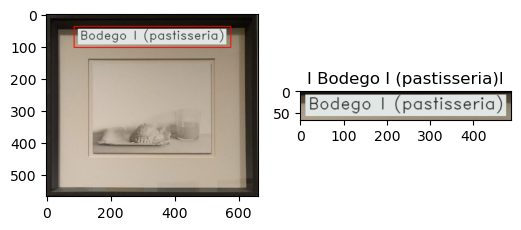

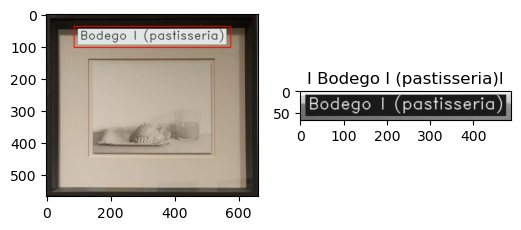

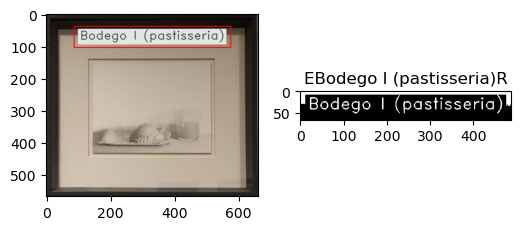

'EBodego I (pastisseria)R'

In [19]:
text_retrieval.get_text_from_image(qsd1_w2[16], verbose=True)
text_retrieval.get_text_from_image(qsd1_w2[16], greys=True, verbose=True)
text_retrieval.get_text_from_image(qsd1_w2[16], binary=True, verbose=True)

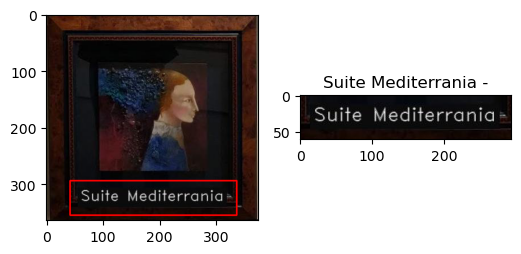

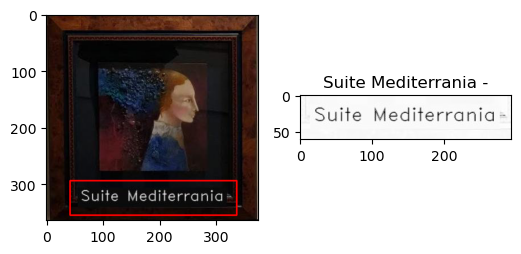

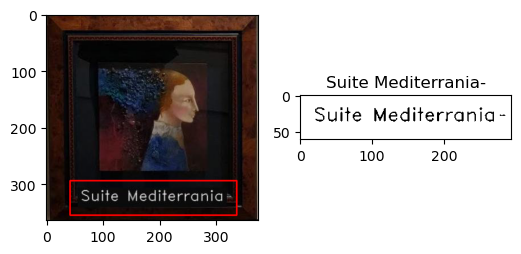

'Suite Mediterrania-'

In [20]:
text_retrieval.get_text_from_image(qsd1_w2[28], verbose=True)
text_retrieval.get_text_from_image(qsd1_w2[28], greys=True, verbose=True)
text_retrieval.get_text_from_image(qsd1_w2[28], binary=True, verbose=True)

### Get text from paintings and save *.txt files (for different approaches: RGB, Greys, Binary with Otsu)

In [21]:
pred_texts_rgb_qsd1_w2_folder = './results/text/pred_texts_rgb_qsd1_w2/'
pred_texts_greys_qsd1_w2_folder = './results/text/pred_texts_greys_qsd1_w2/'
pred_texts_binary_qsd1_w2_folder = './results/text/pred_texts_binary_qsd1_w2/'

In [22]:
text_retrieval.generate_text_files(qsd1_w2, qsd1_w2_files, pred_texts_rgb_qsd1_w2_folder)
text_retrieval.generate_text_files(qsd1_w2, qsd1_w2_files, pred_texts_greys_qsd1_w2_folder, greys=True)
text_retrieval.generate_text_files(qsd1_w2, qsd1_w2_files, pred_texts_binary_qsd1_w2_folder, binary=True)

30it [00:03,  8.06it/s]
30it [00:02, 10.60it/s]
30it [00:02, 11.17it/s]


### Evaluate the different approaches & distances against the Ground Truth

In [23]:
text_retrieval.evaluate_all_get_text(
    gt_text_folder = '../data/qsd1_w2/',
    pred_text_folders = [pred_texts_rgb_qsd1_w2_folder, pred_texts_greys_qsd1_w2_folder, pred_texts_binary_qsd1_w2_folder],
    output_file = './results/text/text_ocr_metrics.csv'
    )

100%|██████████| 62/62 [00:00<00:00, 4242.48it/s]
3it [00:00, 30.35it/s]


### Chose and load best predicted text

In [24]:
pred_texts_greys_qsd1_w2 = data_handler.load_text(folder = pred_texts_greys_qsd1_w2_folder, extension = ".txt", desc = "Loading Predicted Text data...", tuples=False)

Loading Predicted Text data...: 100%|██████████| 30/30 [00:00<00:00, 9480.80it/s]

./results/text/pred_texts_greys_qsd1_w2/ read: 30 images


### Evaluate text retrieval

In [25]:
text_retrieval.run_and_evaluate_text_retrieval(
    text_query_set = pred_texts_greys_qsd1_w2,
    save_folder = pred_texts_greys_qsd1_w2_folder,
    text_database = db_text,
    gt_corresps_folder = '../data/qsd1_w2/',
    output_file = './results/text/text_retrieval_metrics.csv')

Retrieving top 1 results from Text using HAMMING distance: 100%|██████████| 30/30 [00:00<00:00, 271.45it/s]
Retrieving top 3 results from Text using HAMMING distance: 100%|██████████| 30/30 [00:00<00:00, 264.94it/s]
Retrieving top 5 results from Text using HAMMING distance: 100%|██████████| 30/30 [00:00<00:00, 247.89it/s]
Retrieving top 1 results from Text using LEVENSHTEIN distance: 100%|██████████| 30/30 [00:01<00:00, 22.06it/s]
Retrieving top 3 results from Text using LEVENSHTEIN distance: 100%|██████████| 30/30 [00:01<00:00, 22.70it/s]
Retrieving top 5 results from Text using LEVENSHTEIN distance: 100%|██████████| 30/30 [00:01<00:00, 22.77it/s]
Retrieving top 1 results from Text using DAMERAU_LEVENSHTEIN distance: 100%|██████████| 30/30 [00:02<00:00, 14.86it/s]
Retrieving top 3 results from Text using DAMERAU_LEVENSHTEIN distance: 100%|██████████| 30/30 [00:01<00:00, 15.37it/s]
Retrieving top 5 results from Text using DAMERAU_LEVENSHTEIN distance: 100%|██████████| 30/30 [00:01<00:0

### Save distances (to use as features)

In [26]:
dists = text_retrieval.get_text_distances_multiple(
    text_query_set = pred_texts_greys_qsd1_w2,
    save_folder = pred_texts_greys_qsd1_w2_folder,
    text_database = db_text,
    dist = 'damerau_levenshtein'
    )

Getting distances from Text using DAMERAU_LEVENSHTEIN distance: 100%|██████████| 30/30 [00:01<00:00, 15.36it/s]


### Save top k

In [27]:
top_3 = text_retrieval.get_top_k_text_multiple(
    text_query_set = pred_texts_greys_qsd1_w2,
    save_folder = pred_texts_greys_qsd1_w2_folder,
    text_database = db_text,
    k = 3,
    dist = 'damerau_levenshtein'
    )

Retrieving top 3 results from Text using DAMERAU_LEVENSHTEIN distance: 100%|██████████| 30/30 [00:01<00:00, 15.11it/s]


In [28]:
top_5 = text_retrieval.get_top_k_text_multiple(
    text_query_set = pred_texts_greys_qsd1_w2,
    save_folder = pred_texts_greys_qsd1_w2_folder,
    text_database = db_text,
    k = 5,
    dist = 'damerau_levenshtein'
    )

Retrieving top 5 results from Text using DAMERAU_LEVENSHTEIN distance: 100%|██████████| 30/30 [00:02<00:00, 14.35it/s]


### Plot retrieval examples

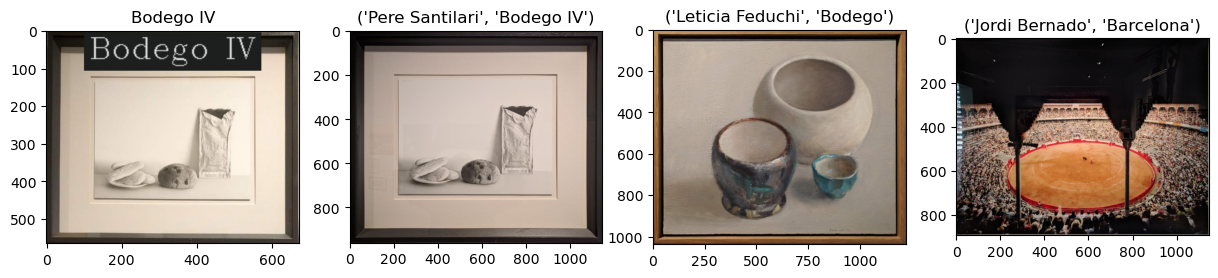

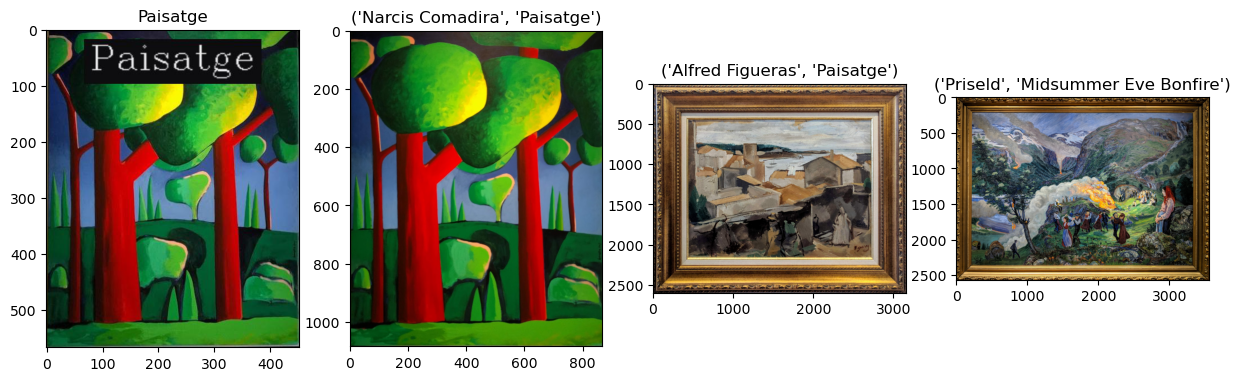

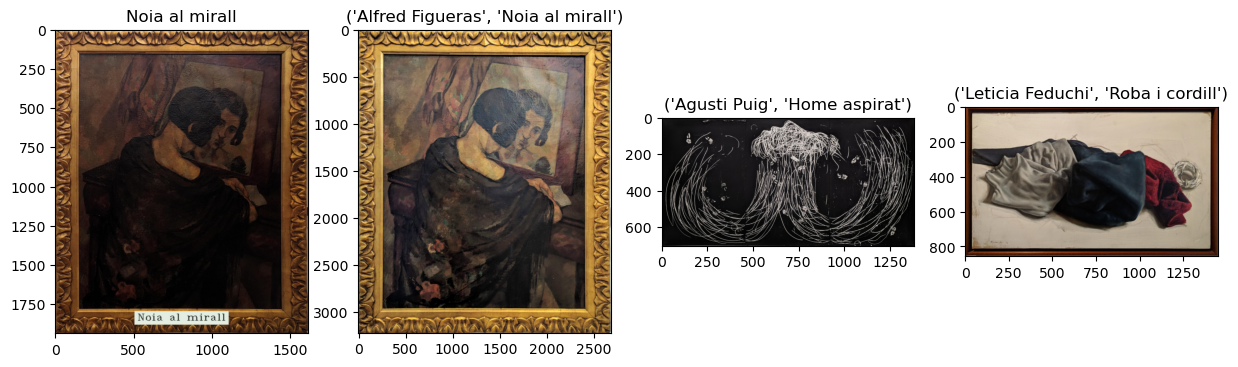

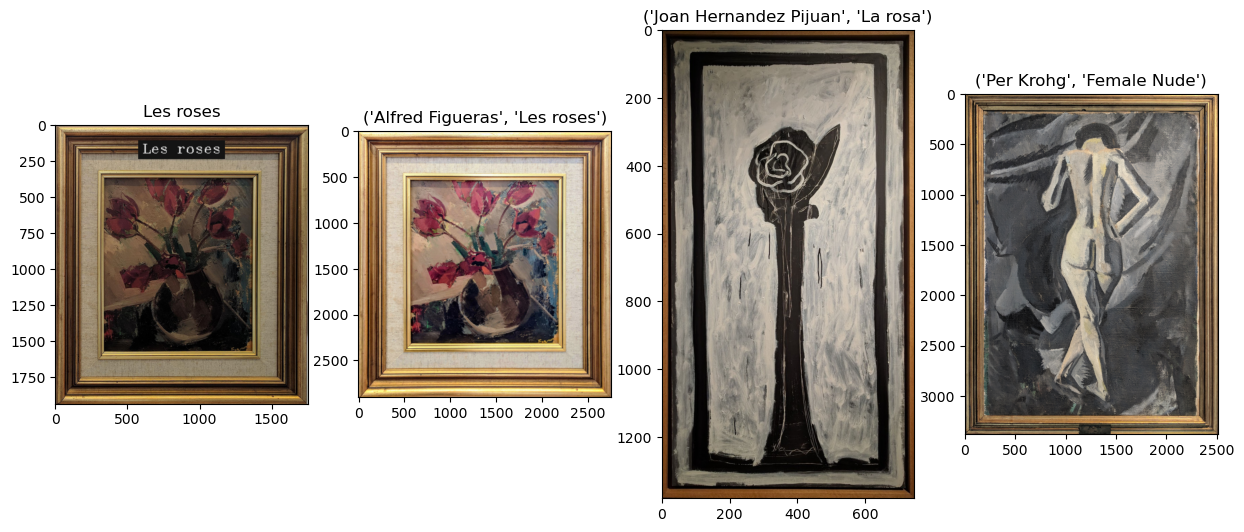

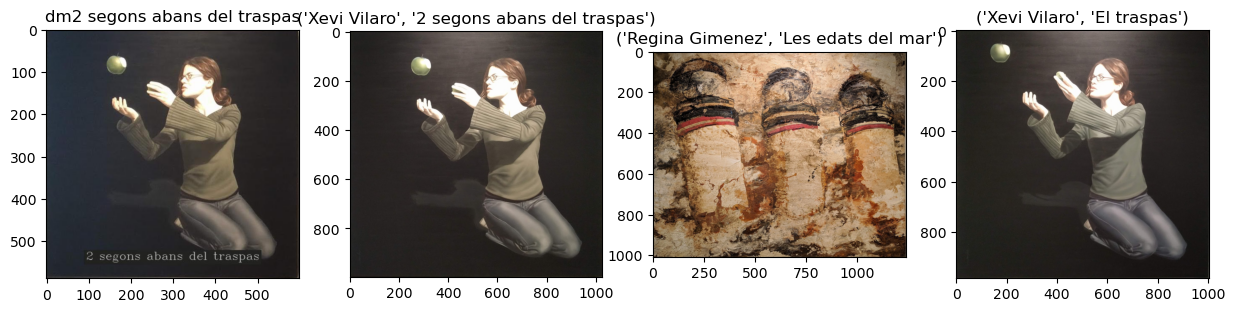

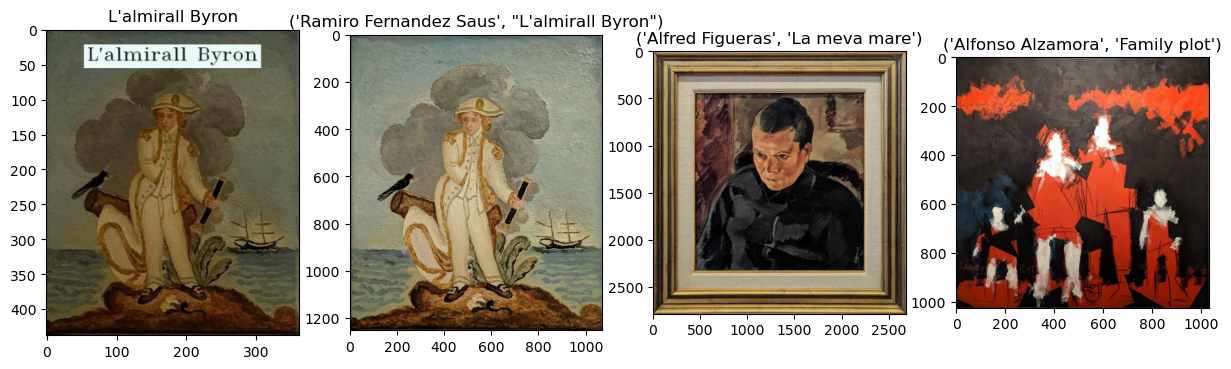

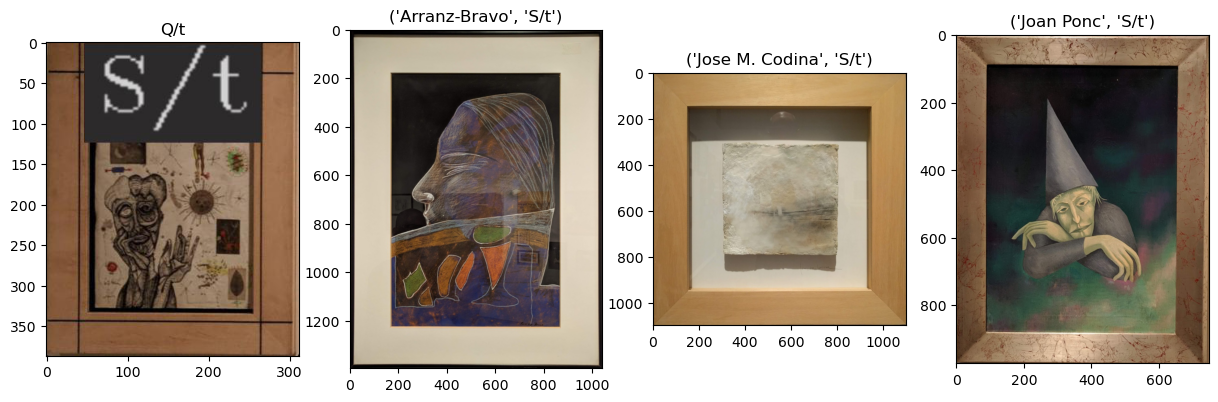

In [29]:
text_retrieval.plot_image_and_similar_by_text(
    db = db,
    db_text = db_text,
    qs = qsd1_w2,
    qs_text = pred_texts_greys_qsd1_w2,
    top_k_qs = top_3,
    examples = 7
    )

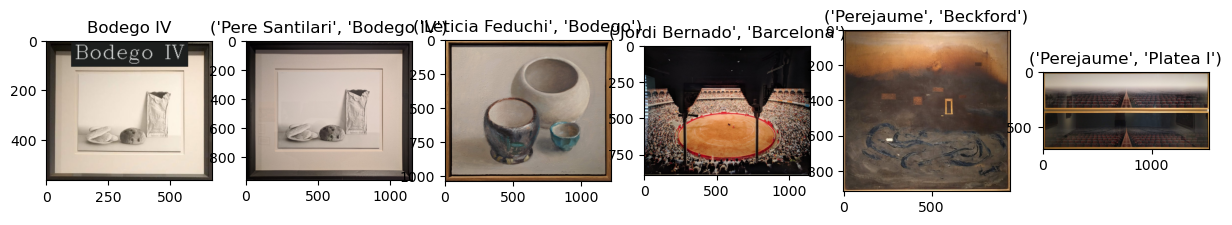

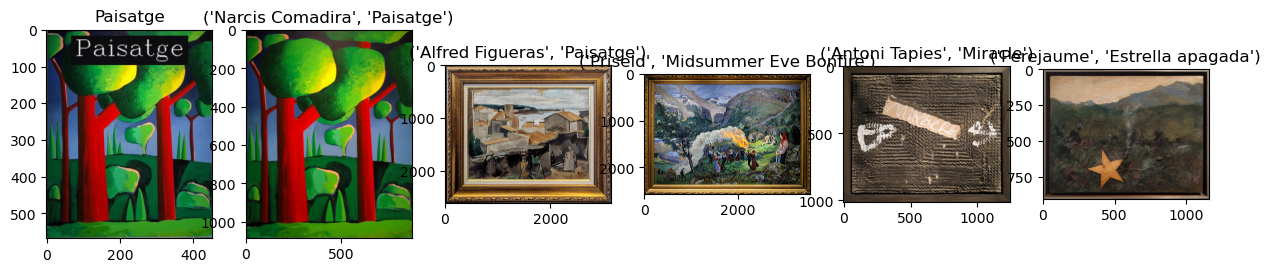

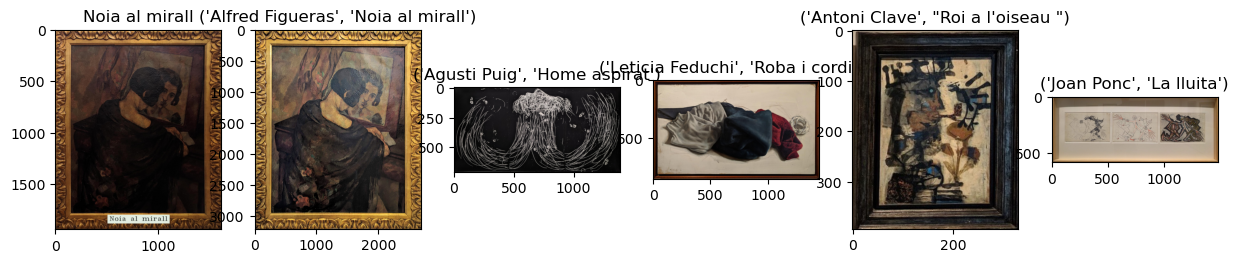

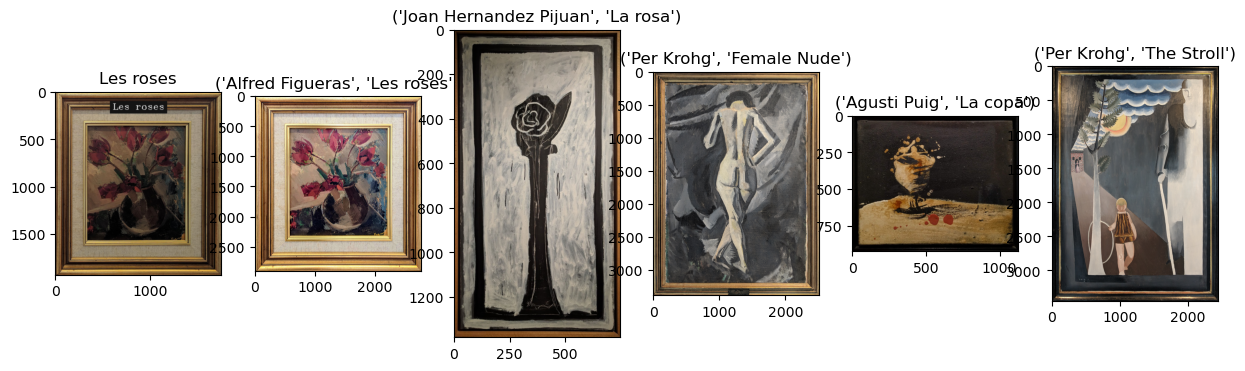

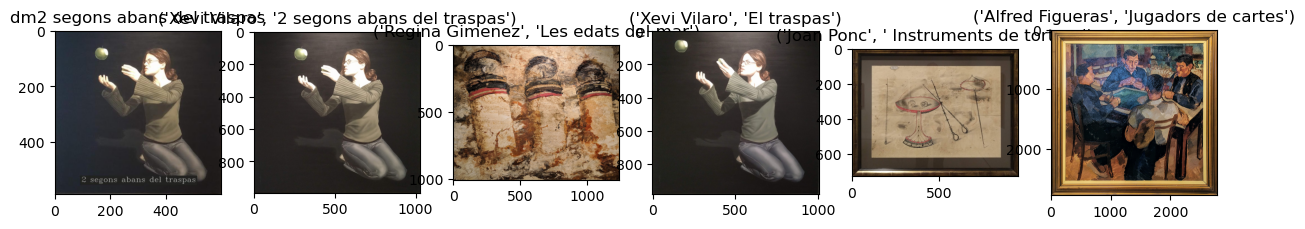

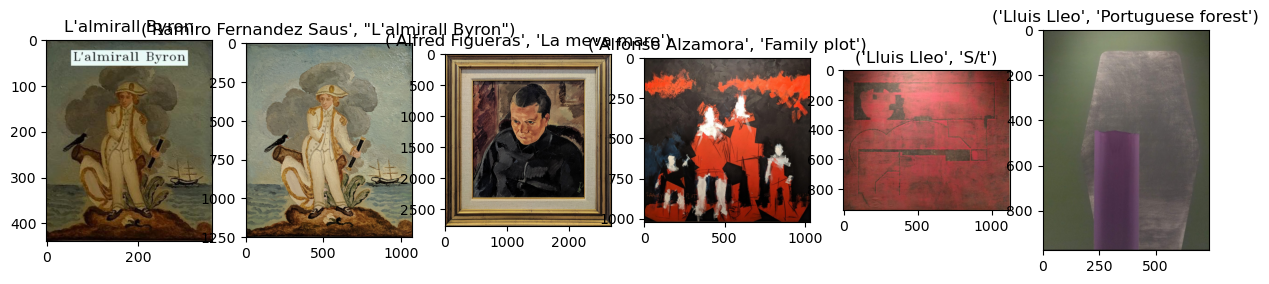

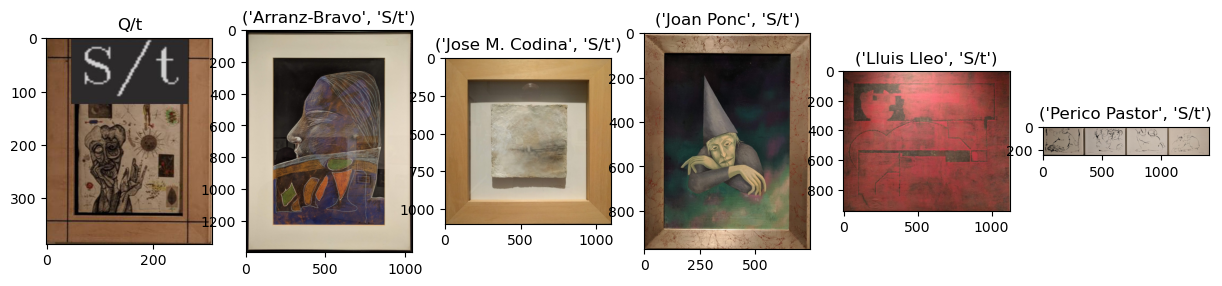

In [30]:
text_retrieval.plot_image_and_similar_by_text(
    db = db,
    db_text = db_text,
    qs = qsd1_w2,
    qs_text = pred_texts_greys_qsd1_w2,
    top_k_qs = top_5,
    examples = 7
    )